<a href="https://colab.research.google.com/github/abdullahyar23/Abdullah-Yar/blob/master/torus_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import image_dataset_from_directory

#from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
#!git clone https://github.com/codebox/image_augmentor.git

Cloning into 'image_augmentor'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 75
Unpacking objects: 100% (78/78), done.


In [ ]:
#!python /content/image_augmentor/main.py /content/drive/MyDrive/torusyeniduzenleme/train/kirik_degil fliph flipv rot_90 noise_0.01

In [ ]:
#!python /content/image_augmentor/main.py /content/drive/MyDrive/torusyeniduzenleme/test/kirik_degil fliph flipv rot_90 noise_0.01

In [ ]:
#!python /content/image_augmentor/main.py /content/drive/MyDrive/torusyeniduzenleme/test/kirik fliph flipv rot_90 noise_0.01

In [ ]:
#!python /content/image_augmentor/main.py /content/drive/MyDrive/torusyeniduzenleme/train/kirik fliph flipv rot_90 noise_0.01

In [ ]:
train = image_dataset_from_directory("/content/drive/MyDrive/torusyeniduzenleme/train", image_size=(100, 100))
test = image_dataset_from_directory("/content/drive/MyDrive/torusyeniduzenleme/test", image_size=(100, 100))

Found 1640 files belonging to 3 classes.
Found 340 files belonging to 3 classes.


In [ ]:
base = ResNet50(include_top=False, input_shape=(100, 100, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base.trainable = False

In [ ]:
model=Sequential()

model.add(base)
model.add(Flatten())
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
hist=model.fit(train, validation_data=test, epochs=5)

Epoch 1/5
52/52 [==============================] - 282s 4s/step - loss: -1072.0159 - accuracy: 0.7512 - val_loss: -30193.2715 - val_accuracy: 0.7647
Epoch 2/5
52/52 [==============================] - 17s 297ms/step - loss: -7335.3213 - accuracy: 0.7591 - val_loss: -272374.2812 - val_accuracy: 0.7647
Epoch 3/5
52/52 [==============================] - 17s 297ms/step - loss: -29982.8926 - accuracy: 0.7591 - val_loss: -5291333.5000 - val_accuracy: 0.7647
Epoch 4/5
52/52 [==============================] - 17s 294ms/step - loss: -87276.8516 - accuracy: 0.7591 - val_loss: -969137.1250 - val_accuracy: 0.7647
Epoch 5/5
52/52 [==============================] - 17s 299ms/step - loss: -228333.8281 - accuracy: 0.7591 - val_loss: -481811.1562 - val_accuracy: 0.7647


In [ ]:
base.trainable = True

In [ ]:
hist=model.fit(train, validation_data=test, epochs=5)

Epoch 1/5
52/52 [==============================] - 17s 294ms/step - loss: -485451.5625 - accuracy: 0.7591 - val_loss: -275003.3750 - val_accuracy: 0.7647
Epoch 2/5
52/52 [==============================] - 17s 294ms/step - loss: -1009667.8750 - accuracy: 0.7591 - val_loss: -181735.5938 - val_accuracy: 0.7647
Epoch 3/5
52/52 [==============================] - 17s 293ms/step - loss: -1850002.7500 - accuracy: 0.7591 - val_loss: -2653521.2500 - val_accuracy: 0.7647
Epoch 4/5
52/52 [==============================] - 17s 295ms/step - loss: -3452356.7500 - accuracy: 0.7591 - val_loss: -3364111.7500 - val_accuracy: 0.7647
Epoch 5/5
52/52 [==============================] - 17s 296ms/step - loss: -5351973.5000 - accuracy: 0.7591 - val_loss: -1458323.0000 - val_accuracy: 0.7647


In [ ]:
model.evaluate(test)

11/11 [==============================] - 2s 57ms/step - loss: -617841.7500 - accuracy: 0.7647


[-617841.75, 0.7647058963775635]

In [ ]:
model.save('/content/drive/MyDrive')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assets


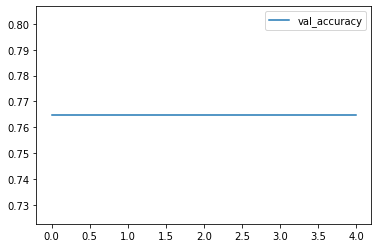

In [ ]:
hist.history.keys()

plt.figure()
#plt.plot(hist.history["loss"],label="Eğitim Loss")
plt.plot(hist.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

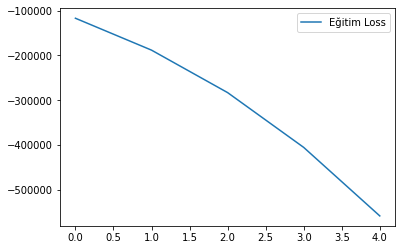

In [ ]:
hist.history.keys()

plt.figure()
plt.plot(hist.history["loss"],label="Eğitim Loss")
#plt.plot(hist.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive")

In [ ]:
score=model.evaluate(test,verbose=1)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

11/11 [==============================] - 33s 344ms/step - loss: -617841.6875 - accuracy: 0.7647
Test loss: -617841.6875
Test accuracy: 0.7647058963775635


In [ ]:
labelless_test = test.map(lambda x, y: x)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
test_labels = test.map(lambda x, y: y)

In [ ]:
temp = list()

In [ ]:
for i in test_labels.as_numpy_iterator():
  temp.append(i.tolist())

In [ ]:
y_true = list()

In [ ]:
for i in temp:
  for j in i:
    y_true.append(j)

In [ ]:
y_pred=model.predict(labelless_test)

In [ ]:
cm=confusion_matrix(y_true,y_pred)

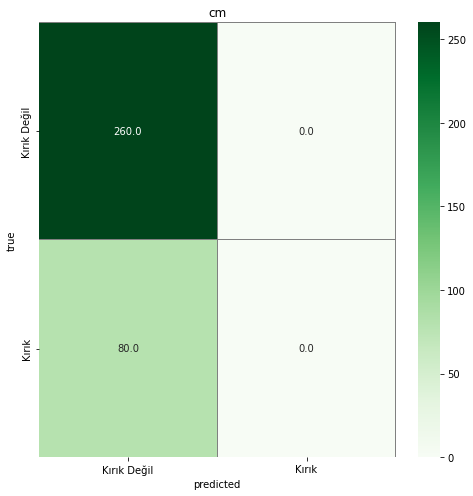

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt=".1f",ax=ax, 
            xticklabels=["Kırık Değil", "Kırık"], yticklabels=["Kırık Değil", "Kırık"])
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("cm")
plt.show()